# MOUSE VIRAL STUDY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mouse_viral_study.csv")

### Data & Viz

In [5]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

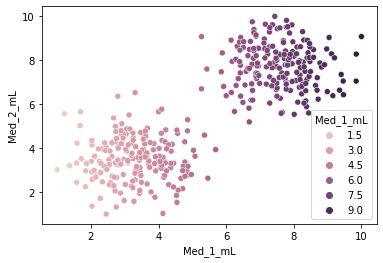

In [6]:
sns.scatterplot(data=df, x="Med_1_mL", y="Med_2_mL", hue="Med_1_mL")

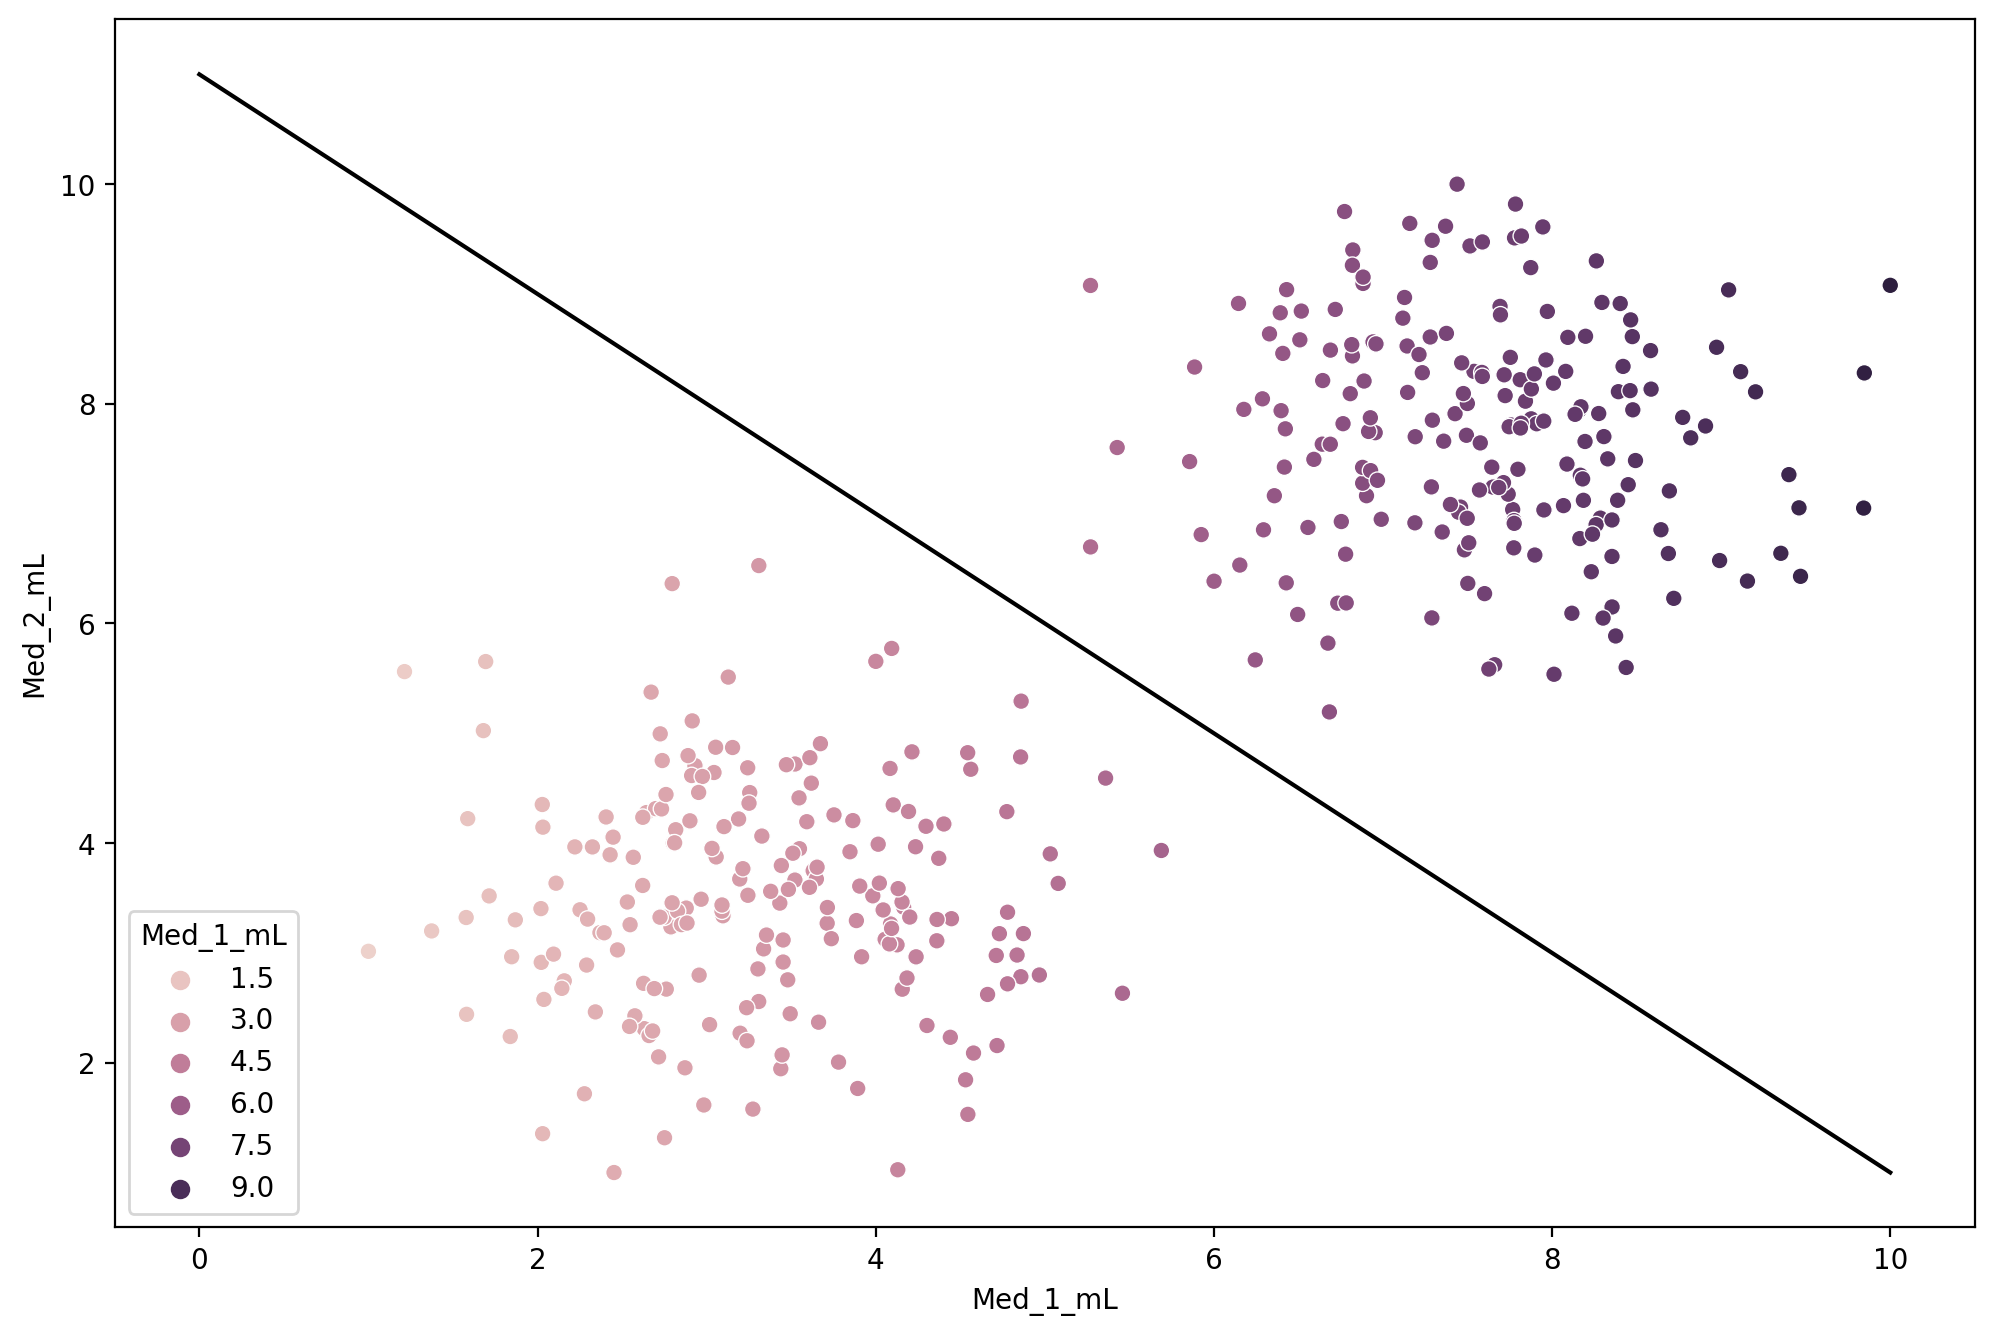

In [9]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x="Med_1_mL", y="Med_2_mL", hue="Med_1_mL")

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b

plt.plot(x,y,"black")

### SVM

In [10]:
from sklearn.svm import SVC

In [11]:
X = df.drop("Virus Present", axis=1)
y = df["Virus Present"]

In [12]:
model = SVC(kernel="linear", C=1000)

In [13]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [15]:
from svm_margin_plot import plot_svm_boundary

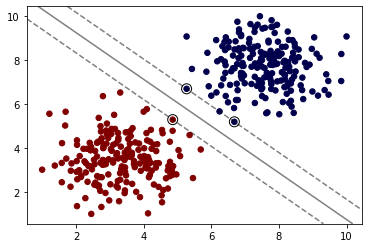

In [16]:
plot_svm_boundary(model,X,y)

### Hyper Parameter C

In [18]:
model = SVC(kernel="linear", C=0.05)
model.fit(X,y)

SVC(C=0.05, kernel='linear')

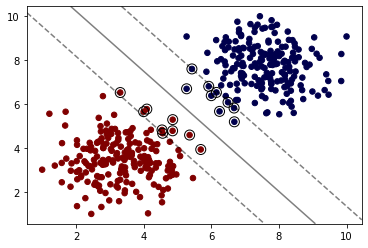

In [19]:
plot_svm_boundary(model,X,y)

In [27]:
model = SVC(kernel="rbf", C=1)
model.fit(X,y)

SVC(C=1)

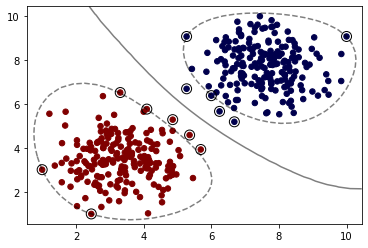

In [28]:
plot_svm_boundary(model,X,y)

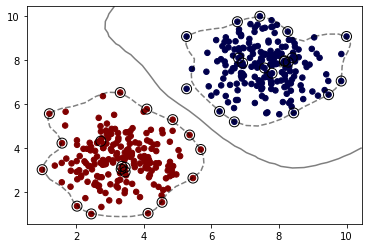

In [30]:
model = SVC(kernel="rbf", C=1, gamma=0.5)
model.fit(X,y)
plot_svm_boundary(model,X,y)

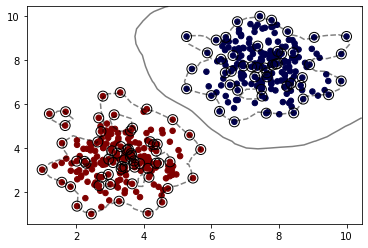

In [32]:
model = SVC(kernel="rbf", C=1, gamma=1.5)
model.fit(X,y)
plot_svm_boundary(model,X,y)

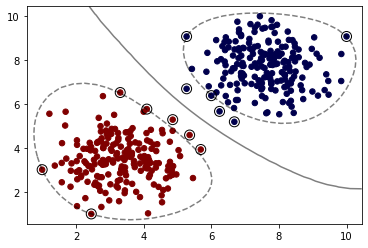

In [33]:
model = SVC(kernel="rbf", C=1, gamma="scale")
model.fit(X,y)
plot_svm_boundary(model,X,y)

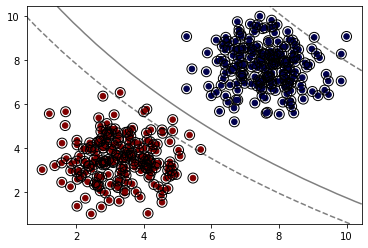

In [34]:
model = SVC(kernel="sigmoid")
model.fit(X,y)
plot_svm_boundary(model,X,y)

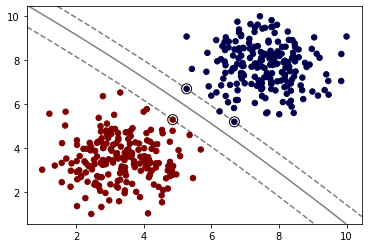

In [41]:
model = SVC(kernel="poly", C=0.05, degree=4)
model.fit(X,y)
plot_svm_boundary(model, X, y)

### Grid CV

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
svm = SVC()
param_grid={
    "C":[0.01,0.1,1],
    "kernel":["linear","rbf"]
}

In [45]:
grid = GridSearchCV(svm, param_grid)

In [46]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [49]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}